In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv('train.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#missing values
total = train.isnull().sum().sort_values(ascending=True)
print(total)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Names and Tickets are not very important for out predictions, so we can drop them, Cabin feature has most of it's values empty, so we can also drop it

# Data cleaning and preparing

In [6]:
train = train.drop(['Cabin', 'Ticket', 'Name'], axis = 1)
test = test.drop(['Cabin', 'Ticket', 'Name'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
#fill empty age values
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [8]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
#fill embarked with most common value
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [10]:
#fill null fare with 0
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [11]:
#categorize Sex
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [12]:
#categorize Embarked
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


# Modeling

In [14]:
train_x = train.drop("Survived", axis=1)
test_x  = test
train_y = train["Survived"]

In [15]:
train_split_x, validate_x, train_split_y, validate_y =train_test_split(train_x, train_y, test_size=0.2)

## Clustering

In [16]:
def plotter(data, labels):
    plt.scatter(data[:,0],data[:,1], c=labels, cmap='summer')

In [17]:
train_x_clst = train_x
test_x_clst = test_x

In [18]:
perplexity_value = 49

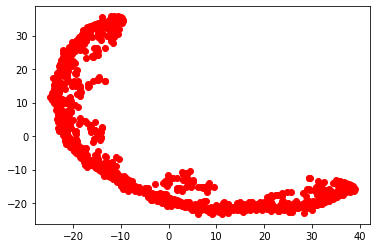

In [19]:
tsne = TSNE(perplexity=perplexity_value, 
            n_iter=10000, random_state=30)
tsne_transform = tsne.fit_transform(train_x_clst)
plotter(tsne_transform, "red")

### K-means

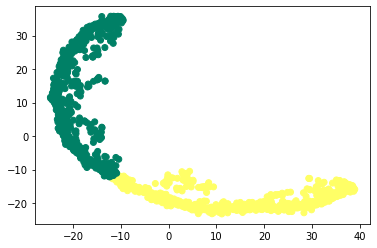

In [20]:
clf = KMeans(n_clusters=2)
labels = clf.fit(tsne_transform).labels_
plotter(tsne_transform, labels)

In [21]:
predict_on_train = clf.fit_predict(tsne_transform)
train['PredictSurvived'] = predict_on_train
train.groupby('PredictSurvived')['PassengerId'].nunique()

PredictSurvived
0    435
1    456
Name: PassengerId, dtype: int64

### Agglomerative Clustering

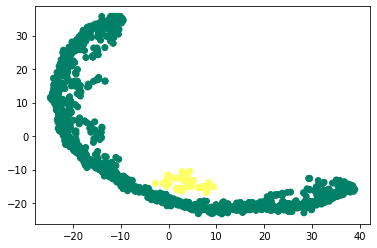

In [22]:
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels = clf.fit(tsne_transform).labels_
plotter(tsne_transform, labels)

In [23]:
predict_on_train = clf.fit_predict(tsne_transform)
train['PredictSurvived'] = predict_on_train
train.groupby('PredictSurvived')['PassengerId'].nunique()

PredictSurvived
0    840
1     51
Name: PassengerId, dtype: int64

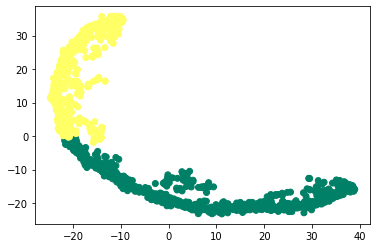

In [24]:
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = clf.fit(tsne_transform).labels_
plotter(tsne_transform, labels)

In [25]:
predict_on_train = clf.fit_predict(tsne_transform)
train['PredictSurvived'] = predict_on_train
train.groupby('PredictSurvived')['PassengerId'].nunique()

PredictSurvived
0    534
1    357
Name: PassengerId, dtype: int64

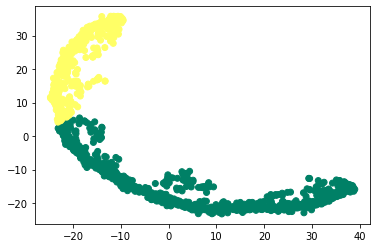

In [26]:
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
labels = clf.fit(tsne_transform).labels_
plotter(tsne_transform, labels)

In [27]:
predict_on_train = clf.fit_predict(tsne_transform)
train['PredictSurvived'] = predict_on_train
train.groupby('PredictSurvived')['PassengerId'].nunique()

PredictSurvived
0    591
1    300
Name: PassengerId, dtype: int64

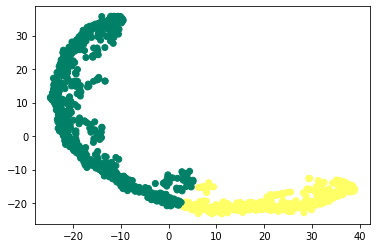

In [28]:
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = clf.fit(tsne_transform).labels_
plotter(tsne_transform, labels)

In [29]:
predict_on_train = clf.fit_predict(tsne_transform)
train['PredictSurvived'] = predict_on_train
train.groupby('PredictSurvived')['PassengerId'].nunique()

PredictSurvived
0    593
1    298
Name: PassengerId, dtype: int64

In [30]:
train.groupby('Survived')['PassengerId'].nunique()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

So, the accuracy of those clustering methods will be +-0.5, we could improve that parameter slightly by tuning parameters of classifirs, but it would have small impact